# **Black Friday Sales Analysis**

### Overview
This project analyzes customer purchase behavior during the **Black Friday Sale**.  
The goal is to uncover trends, identify high-spending customer segments, and provide insights that can help businesses optimize marketing and sales strategies.

### Objectives
- Understand purchasing patterns across age groups, gender, and occupation.  
- Identify which product categories drive the most revenue.  
- Examine the relationship between customer demographics and total sp
- All this will be explained through immersive visualsending.

## 1. Importing Libraries and Loading Data
We'll start by importing necessary Python libraries and loading the dataset for analysis.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## 2. Data Overview and Cleaning

Before diving into analysis, we’ll inspect the data for:
- Missing or null values  
- Duplicates  
- Data types  
- Inconsistent formatting 

In [11]:
df.shape

(537577, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [15]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

**Note:** We cant remove the null values using dropna() function, as it will remove all those rows which have the null which mean almost 60% of my data .That's why we will only remove the columns whih contains the null values, as they have soo many null values they are not of any good use to us.

In [18]:
#removing the columns
del df['Product_Category_2']
del df['Product_Category_3']

In [20]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# 3. Analyzing the Columns

In [25]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

In [27]:
for i in df.columns:
    print(i,'-',df[i].nunique())

User_ID - 5891
Product_ID - 3623
Gender - 2
Age - 7
Occupation - 21
City_Category - 3
Stay_In_Current_City_Years - 5
Marital_Status - 2
Product_Category_1 - 18
Purchase - 17959


## 4 . Exploratory Data Analysis (EDA)

We’ll now explore patterns and relationships in the data to answer key questions:
1. Which gender spends more?
2. How does age influence purchase behav
3. How does marital status influence purchase?i5r?
3. What are the top product categories by reve6ue?
4. How do city categories differ in total 
7. How different occupations affect sales number ?sales?


## (i). Gender Wise Spending

<Axes: title={'center': 'Gender Ratio'}>

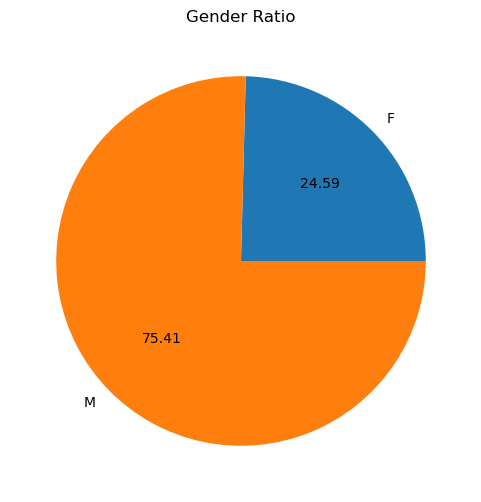

In [35]:
# No. of sales by Gender
df.groupby('Gender').size().plot(kind = 'pie' ,autopct = '%.2f',
                                           figsize = (6,6),
                                           title= 'Gender Ratio')

<Axes: ylabel='Purchase'>

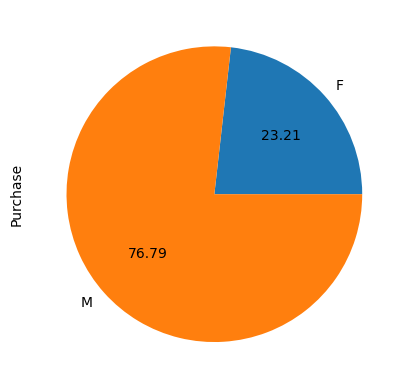

In [41]:
#Sales amount by Gender
df.groupby('Gender')['Purchase'].sum().plot(kind='pie',autopct = '%.2f')

<Axes: ylabel='Purchase'>

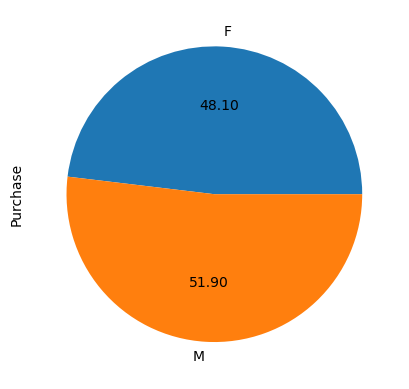

In [43]:
# Average of Purchase amount
df.groupby('Gender')['Purchase'].mean().plot(kind='pie',autopct = '%.2f')

### Using Multiple columns With Gender

<Axes: xlabel='Age', ylabel='Purchase'>

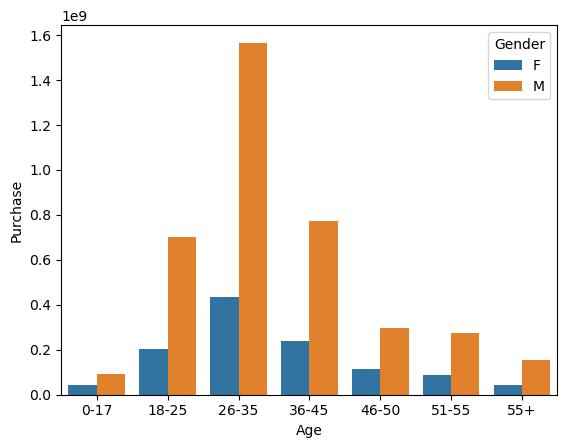

In [91]:
# Gender With Age
sns.barplot(data = df.groupby(['Age','Gender'])['Purchase'].sum().reset_index() , x = 'Age' , y = 'Purchase' , hue = 'Gender')

<Axes: xlabel='Age', ylabel='Purchase'>

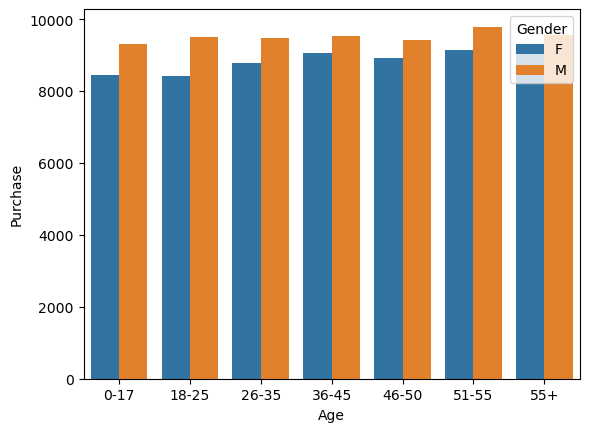

In [93]:
# Mean 
sns.barplot(data = df.groupby(['Age','Gender'])['Purchase'].mean().reset_index() , x = 'Age' , y = 'Purchase' , hue = 'Gender')

<Axes: xlabel='Gender', ylabel='count'>

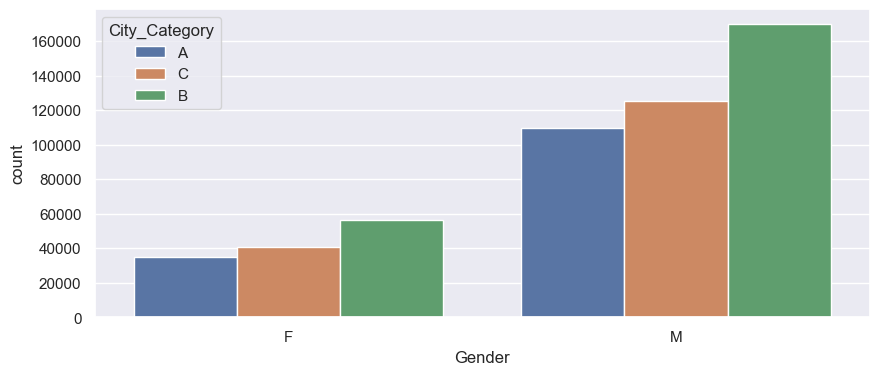

In [95]:
#Gender with City Category
sns.set(rc = {'figure.figsize':(10,4)})
sns.countplot(data = df ,x = 'Gender' ,hue = 'City_Category')

<Axes: xlabel='Occupation', ylabel='count'>

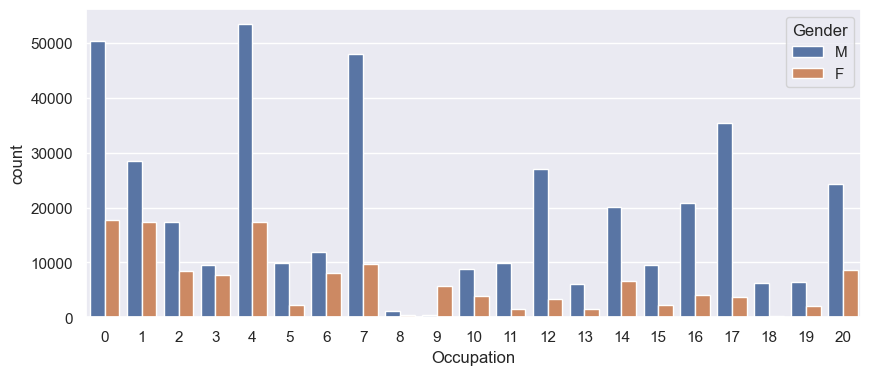

In [97]:
# Gender with Occupation
sns.set(rc = {'figure.figsize':(10,4)})
sns.countplot(data = df ,x = 'Occupation' ,hue = 'Gender')

### Creating New Column By  Combining Gender And the Marital Status

In [101]:
ls=[]
for i in range(len(df)):
    ls.append(df['Gender'][i]+"_"+str(df['Marital_Status'][i]))
df['Maritalgender'] = ls
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,AgeBracket,Maritalgender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,kids,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,kids,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,kids,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,kids,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,older,M_0


<Axes: xlabel='Maritalgender', ylabel='count'>

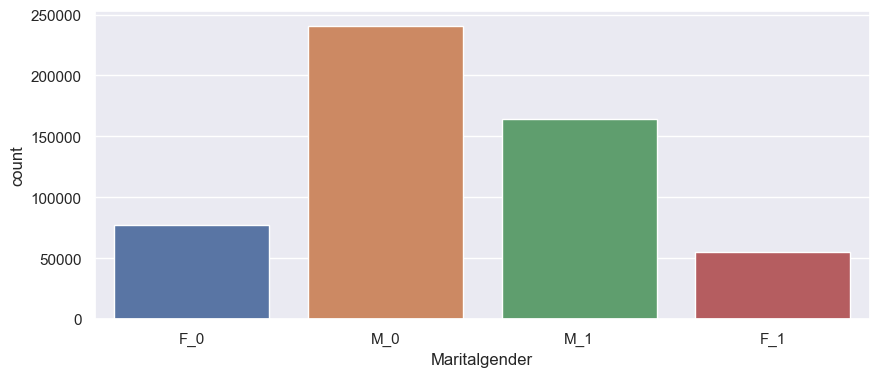

In [103]:
sns.countplot(data = df ,x = 'Maritalgender' , hue = 'Maritalgender')

<Axes: xlabel='Product_Category_1', ylabel='count'>

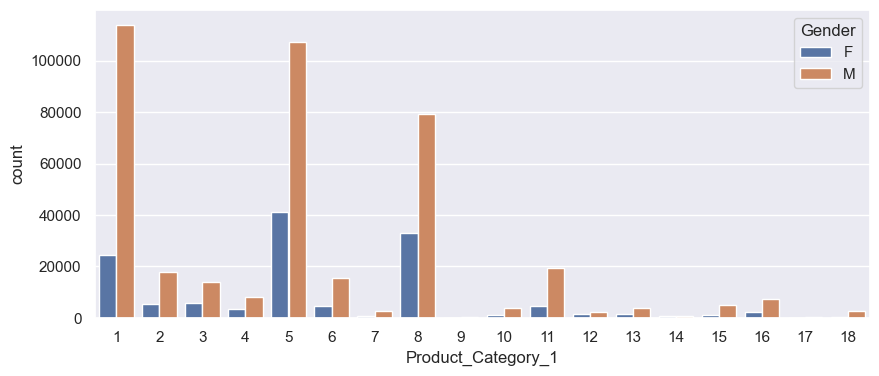

In [107]:
# Product Category and Gender
sns.countplot( data = df ,x ='Product_Category_1' , hue = 'Gender')

## (ii). Based on the Marital Status & Age

<Axes: title={'center': 'Age Purchas Distribution'}, xlabel='Age'>

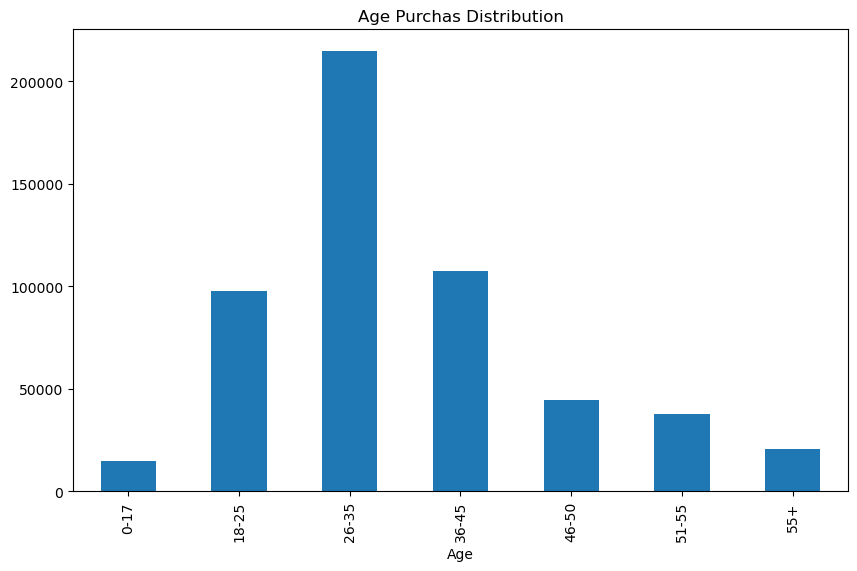

In [46]:
df.groupby('Age').size().plot(kind = 'bar' ,figsize = (10,6) ,title = 'Age Purchas Distribution')

<Axes: xlabel='Age'>

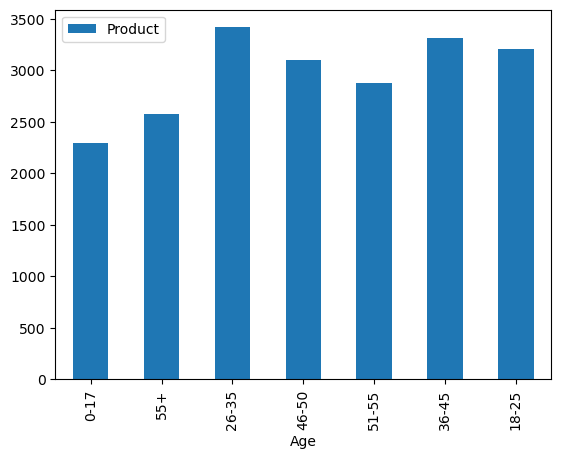

In [48]:
# Number of unique purchase by each age group
lst=[]
for i in df['Age'].unique():
    lst.append((i , df[df['Age']==i]['Product_ID'].nunique()))
data = pd.DataFrame(lst , columns = ['Age' , 'Product'])
data
data.plot(kind = 'bar' , x = 'Age' )

<Axes: title={'center': 'Amount Spend By Age'}, ylabel='Purchase'>

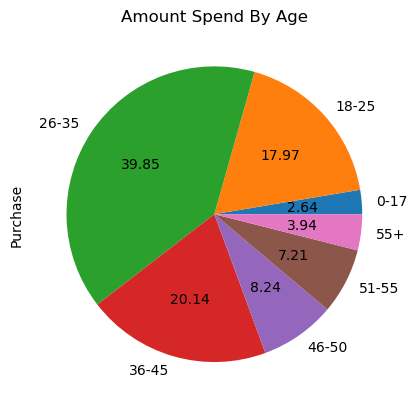

In [52]:
# Distribution Of Sum Of Purchases by age
df.groupby('Age')['Purchase'].sum().plot(kind = 'pie' , autopct = '%.2f' ,title = 'Amount Spend By Age')

<Axes: title={'center': 'Mean Amount Spend By Age'}, ylabel='Purchase'>

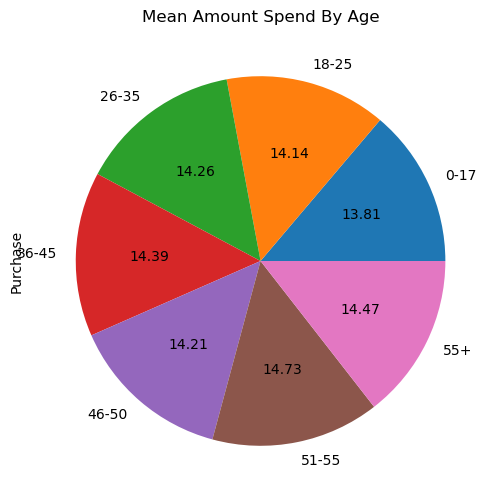

In [54]:
#Average Purchae Distribution by Age
df.groupby('Age')['Purchase'].mean().plot(kind = 'pie' , autopct ='%.2f', figsize = (10,6) , title = 'Mean Amount Spend By Age')

In [56]:
# Creating New Column to different Age Numbers into Kids, Adults and older Category
ls = []
for i in range(len(df)):
    if df['Age'][i] == '0-17' or df['Age'][i] == '18-25' :
        ls.append('kids')
    elif df['Age'][i] == '26-35' or df['Age'][i] == '36-45':
        ls.append('Adults')
    else:
        ls.append('older')
df['AgeBracket'] = ls       

<Axes: xlabel='AgeBracket', ylabel='count'>

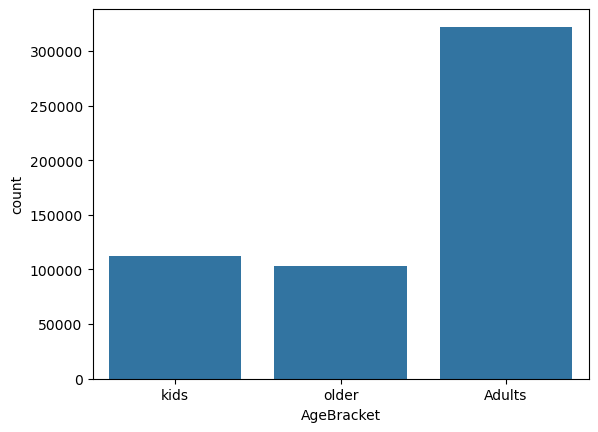

In [58]:
sns.countplot(data = df , x ='AgeBracket')

<Axes: >

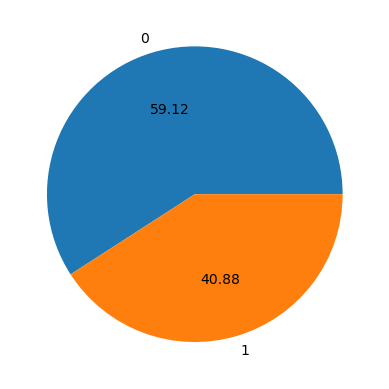

In [60]:
# By marital Status
df.groupby('Marital_Status').size().plot(kind = 'pie' , autopct='%.2f')

### Using Multiple columns With Age & Marital Status

<Axes: xlabel='Occupation', ylabel='count'>

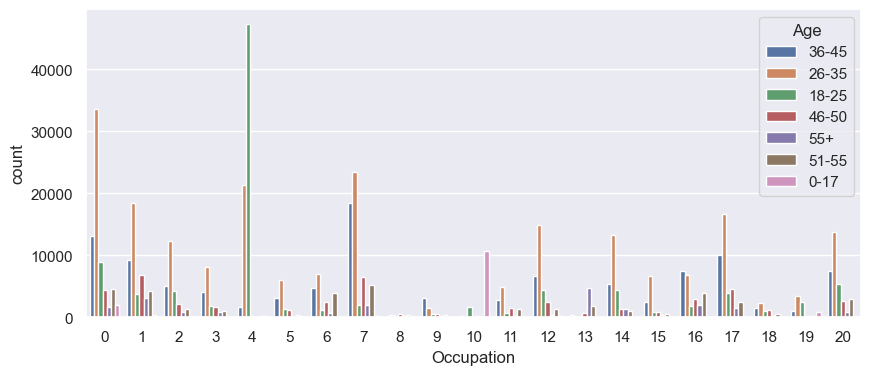

In [113]:
sns.set(rc = {'figure.figsize':(10,4)})
sns.countplot(data = df ,x = 'Occupation' ,hue = 'Age')

<Axes: xlabel='Age', ylabel='count'>

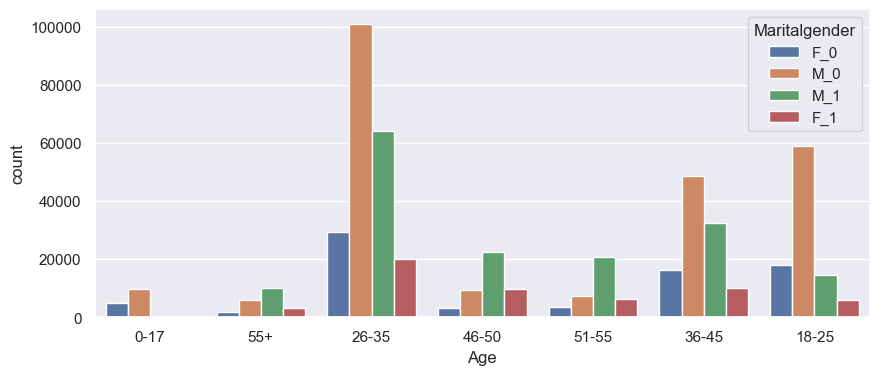

In [117]:
sns.countplot(data = df ,x = 'Age' , hue = 'Maritalgender')

<Axes: xlabel='Age', ylabel='count'>

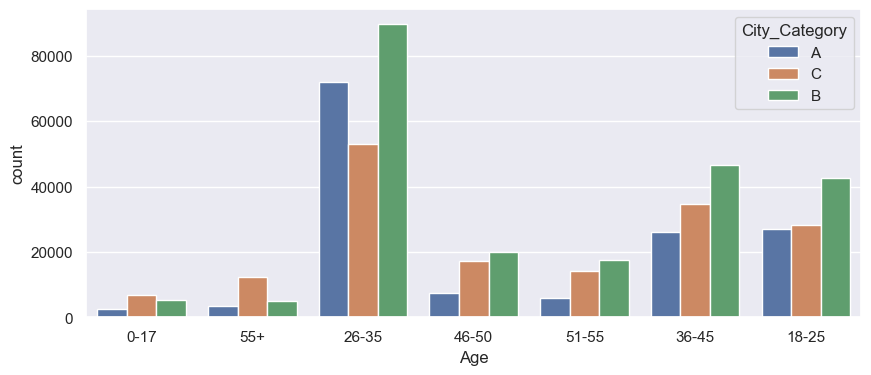

In [115]:
sns.set(rc = {'figure.figsize':(10,4)})
sns.countplot(data = df ,x = 'Age' ,hue = 'City_Category')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

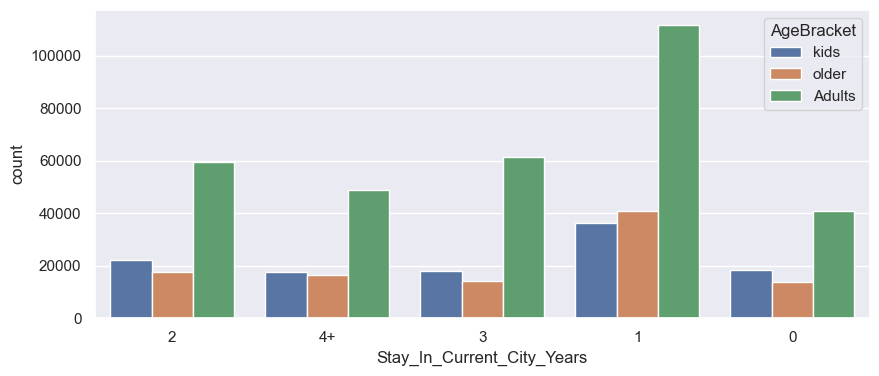

In [119]:
sns.countplot(data = df , x ='Stay_In_Current_City_Years' , hue = 'AgeBracket')

<Axes: xlabel='Marital_Status', ylabel='count'>

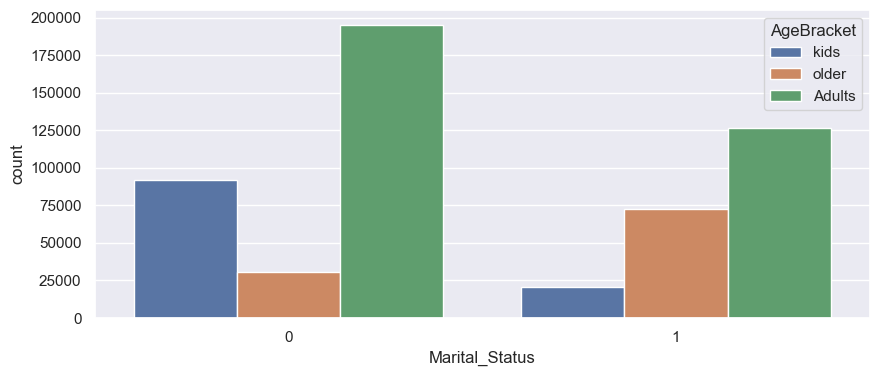

In [121]:
sns.countplot(data = df , x ='Marital_Status' , hue = 'AgeBracket')

<Axes: xlabel='Product_Category_1', ylabel='count'>

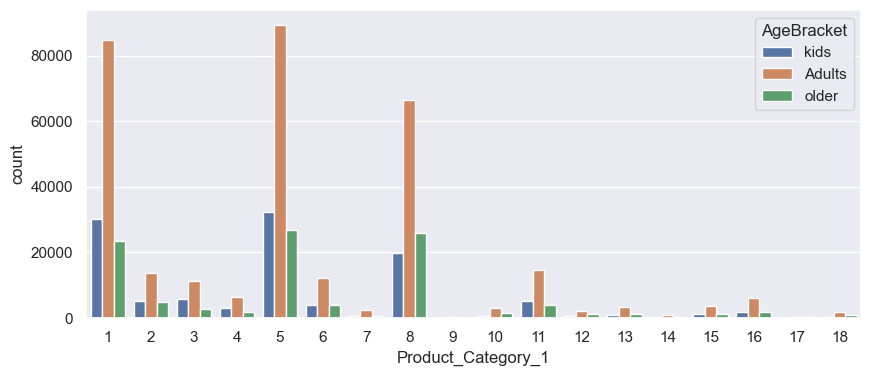

In [123]:
sns.countplot(data = df , x ='Product_Category_1' , hue = 'AgeBracket')

## (iii). Analysis by City Category

<Axes: >

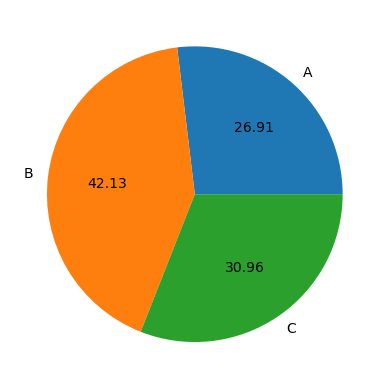

In [65]:
#Distribution of Purchase Number by City Category
df.groupby('City_Category').size().plot(kind = 'pie' , autopct = '%.2f')

<Axes: ylabel='Purchase'>

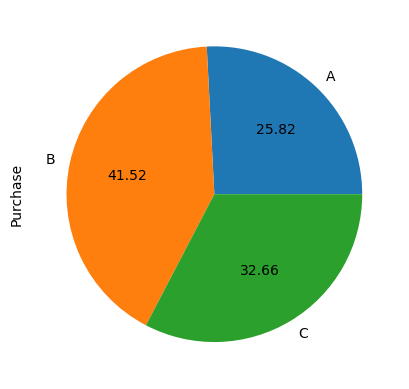

In [70]:
# Sum Of Purchases
df.groupby('City_Category')['Purchase'].sum().plot(kind = 'pie' , autopct = '%.2f')

<Axes: ylabel='Purchase'>

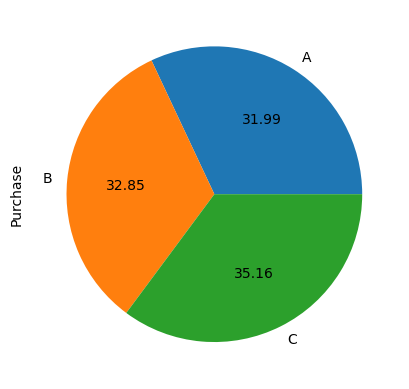

In [72]:
# Distribution OF Average
df.groupby('City_Category')['Purchase'].mean().plot(kind = 'pie' , autopct = '%.2f')

### Using Multiple columns With City Category

<Axes: xlabel='City_Category', ylabel='count'>

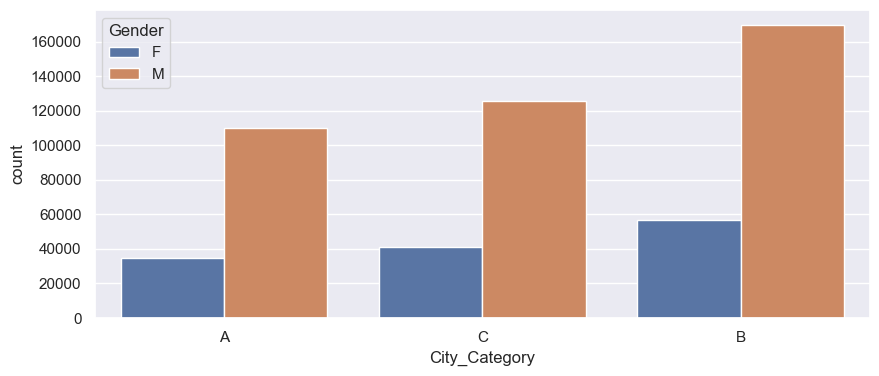

In [126]:
sns.set(rc = {'figure.figsize':(10,4)})
sns.countplot(data = df ,x = 'City_Category' ,hue = 'Gender')

<Axes: xlabel='City_Category', ylabel='count'>

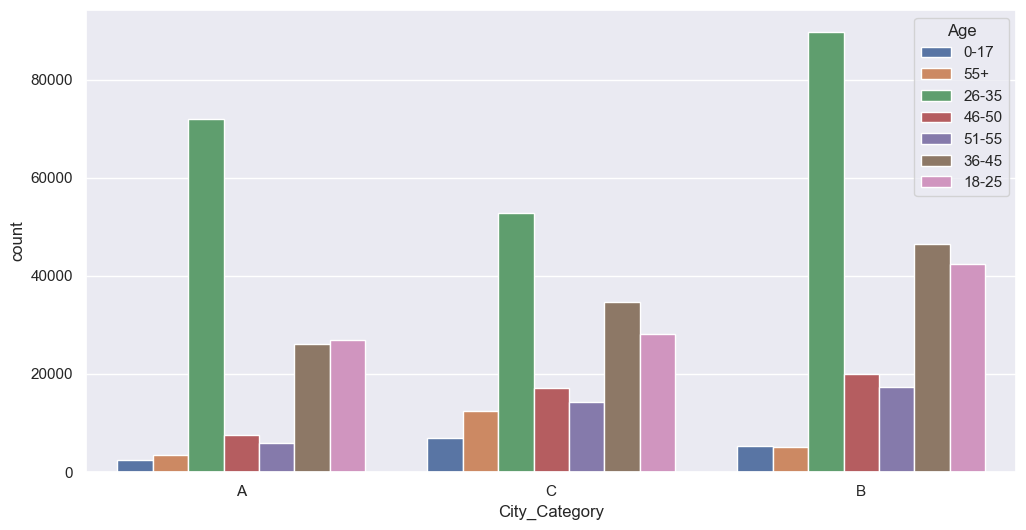

In [128]:
sns.set(rc = {'figure.figsize':(12,6)})
sns.countplot(data = df ,x = 'City_Category' ,hue = 'Age')

<Axes: xlabel='City_Category', ylabel='count'>

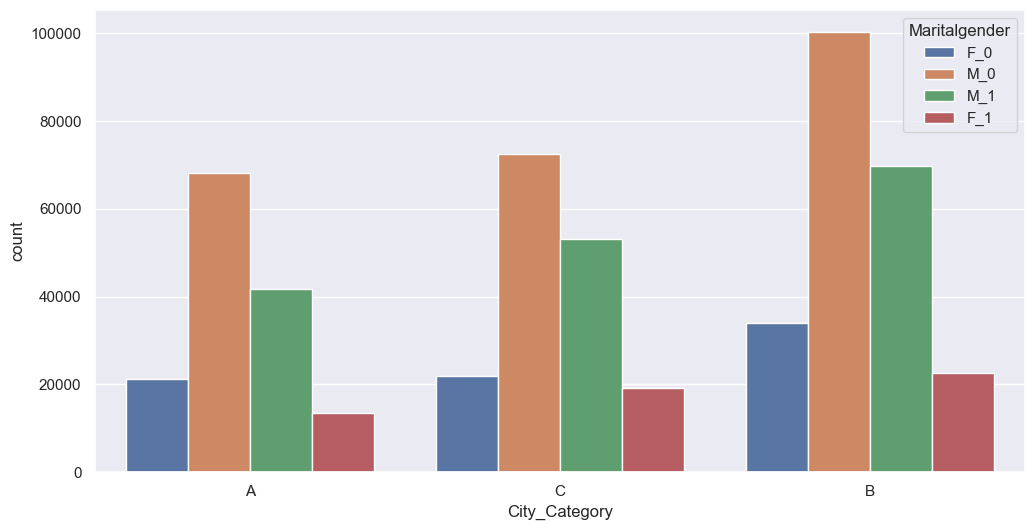

In [130]:
sns.countplot(data = df ,x = 'City_Category' , hue = 'Maritalgender')

##  (iv) .By Number Of Years In Current City 

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

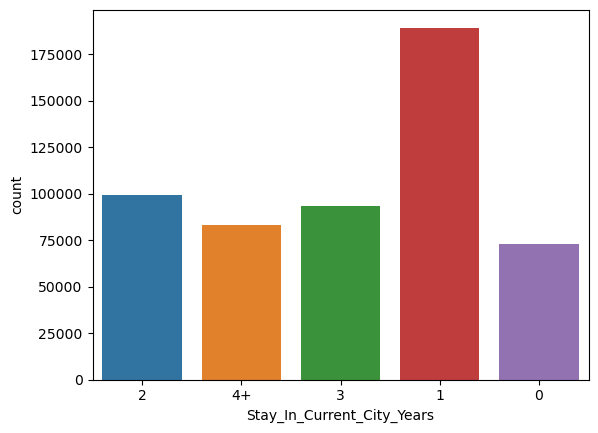

In [75]:
sns.countplot( data = df ,x ='Stay_In_Current_City_Years' , hue = 'Stay_In_Current_City_Years')

<Axes: >

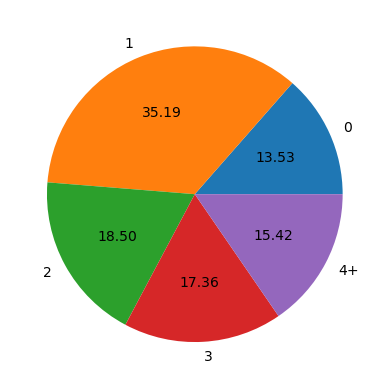

In [77]:
# Distribution Of Purchases No.
df.groupby('Stay_In_Current_City_Years').size().plot(kind = 'pie' , autopct='%.2f')

<Axes: ylabel='Purchase'>

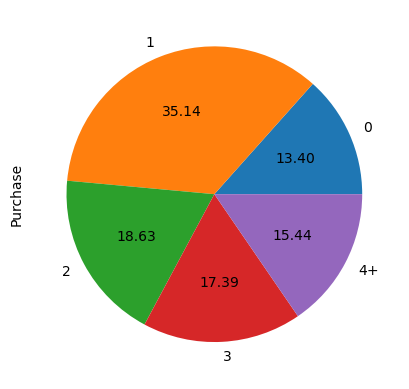

In [79]:
# Distribution Sum Of Purchase
df.groupby('Stay_In_Current_City_Years')['Purchase'].sum().plot(kind = 'pie' , autopct='%.2f')

<Axes: ylabel='Purchase'>

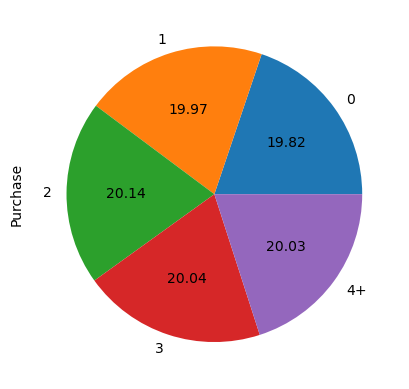

In [81]:
# Average Spent
df.groupby('Stay_In_Current_City_Years')['Purchase'].mean().plot(kind = 'pie' , autopct='%.2f')

### Using Multiple Columns with Years in Current City 

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

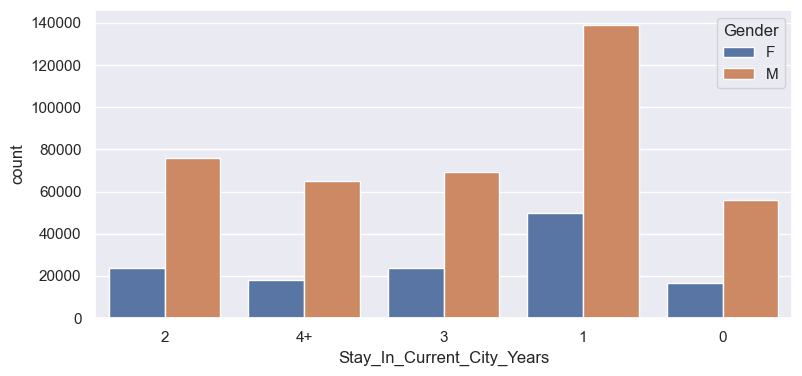

In [138]:
sns.set(rc = {'figure.figsize':(9,4)})
sns.countplot( data = df ,x ='Stay_In_Current_City_Years' , hue = 'Gender')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

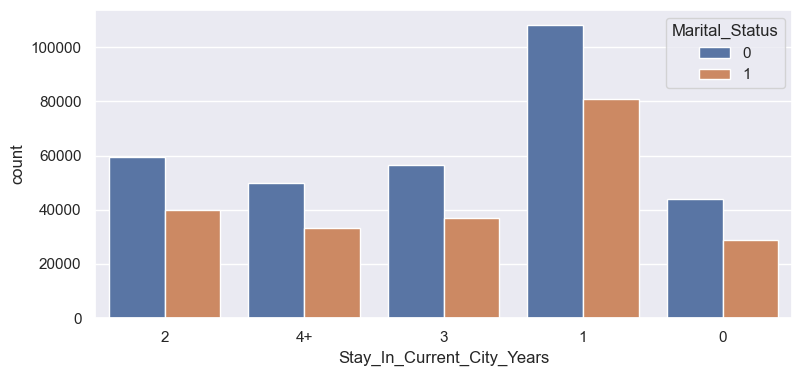

In [140]:
sns.set(rc = {'figure.figsize':(9,4)})
sns.countplot( data = df ,x ='Stay_In_Current_City_Years' , hue = 'Marital_Status')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

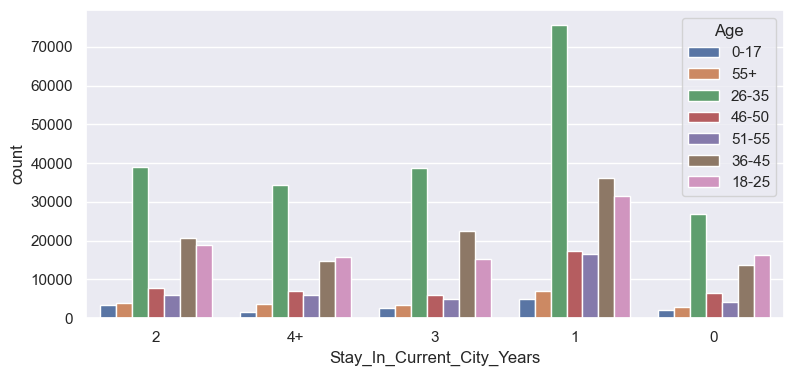

In [142]:
sns.countplot( data = df ,x ='Stay_In_Current_City_Years' , hue = 'Age')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

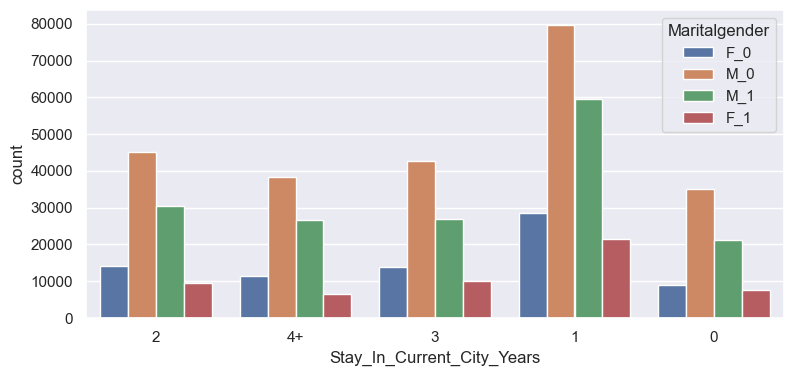

In [144]:
sns.countplot(data = df ,x = 'Stay_In_Current_City_Years' , hue = 'Maritalgender')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

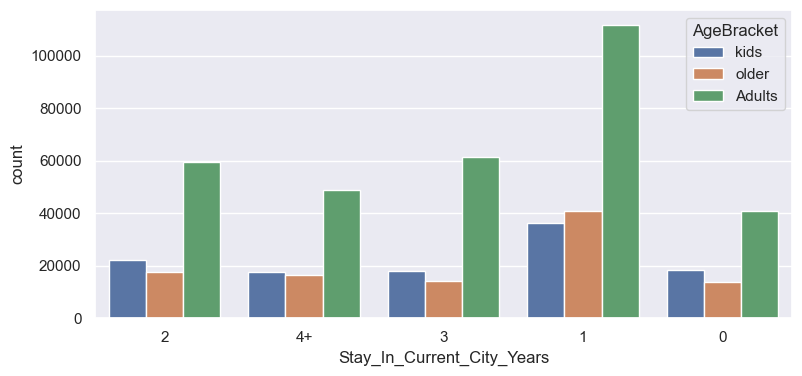

In [146]:
sns.countplot(data = df , x ='Stay_In_Current_City_Years' , hue = 'AgeBracket')

## (v). Analysis By Occupation

<Axes: xlabel='Occupation', ylabel='count'>

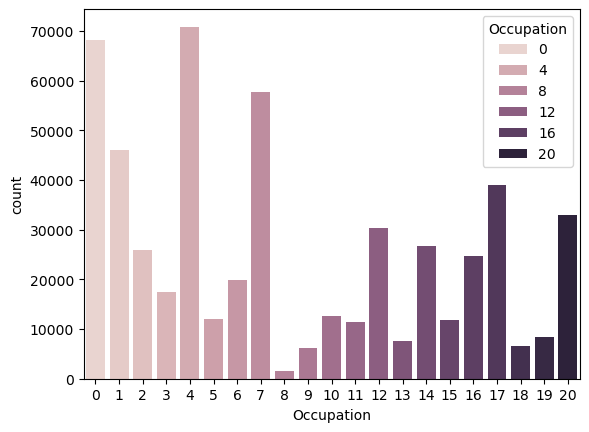

In [84]:
sns.countplot(data = df, x = 'Occupation' , hue = 'Occupation'  )

<Axes: xlabel='Occupation'>

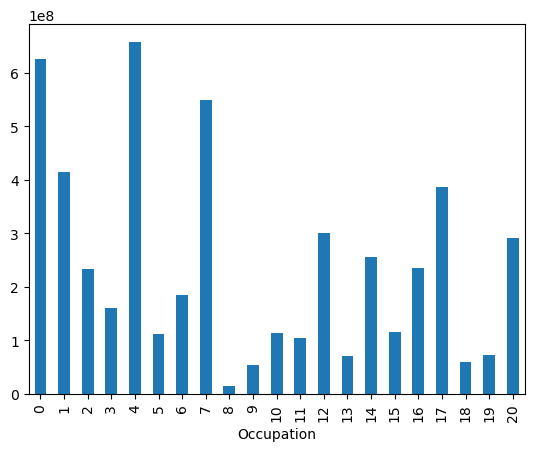

In [86]:
df.groupby('Occupation')['Purchase'].sum().plot(kind='bar' )

<Axes: xlabel='Occupation'>

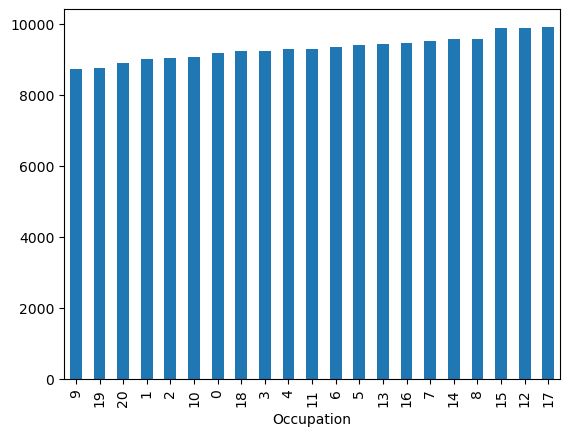

In [88]:
df.groupby('Occupation')['Purchase'].mean().sort_values().plot(kind='bar' )

### Using Multiple Columns with Occupation 

<Axes: xlabel='Occupation', ylabel='count'>

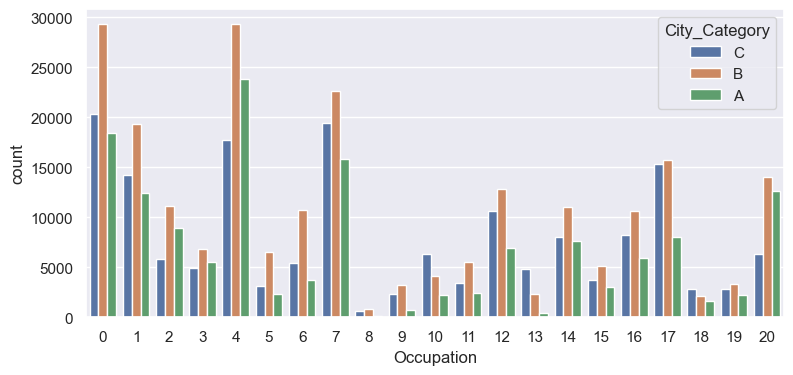

In [151]:
sns.countplot(data = df ,x = 'Occupation' ,hue = 'City_Category')

<Axes: xlabel='Occupation', ylabel='count'>

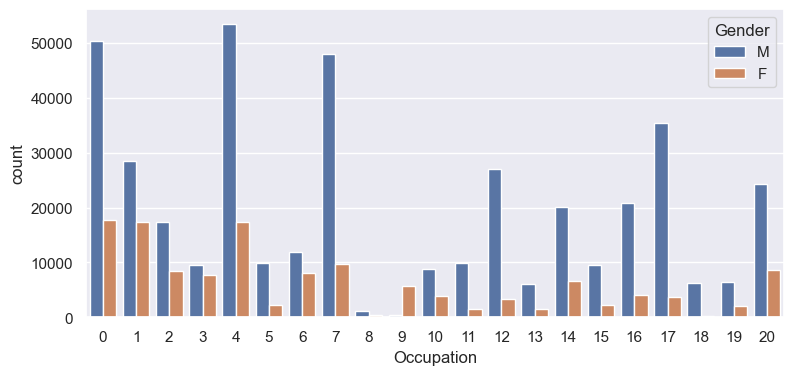

In [153]:
sns.countplot(data = df ,x = 'Occupation' ,hue = 'Gender')

<Axes: xlabel='Occupation', ylabel='count'>

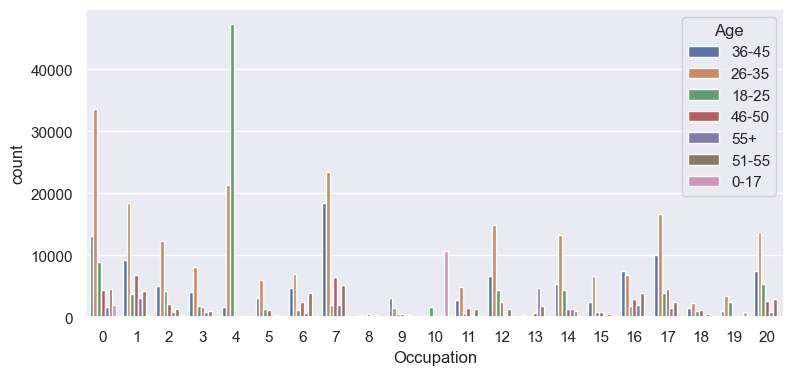

In [155]:
sns.countplot(data = df ,x = 'Occupation' ,hue = 'Age')

<Axes: xlabel='Occupation', ylabel='count'>

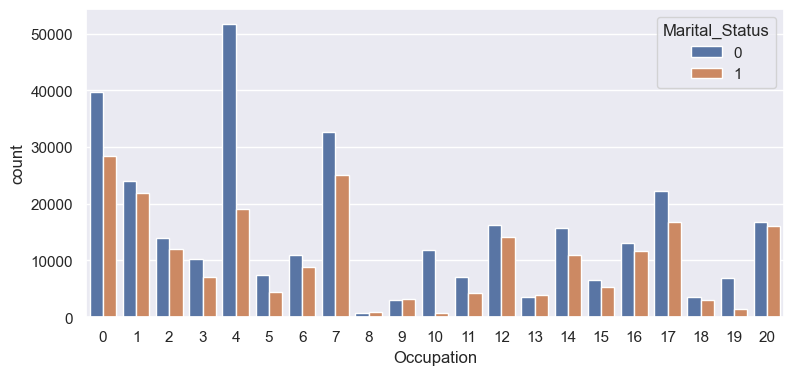

In [157]:
sns.countplot( data = df ,x ='Occupation' , hue = 'Marital_Status')

<Axes: xlabel='Occupation', ylabel='count'>

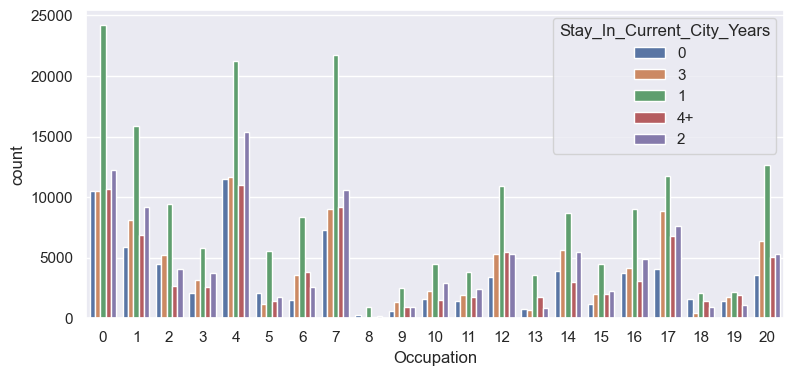

In [159]:
sns.countplot( data = df ,x ='Occupation' , hue = 'Stay_In_Current_City_Years')

<Axes: xlabel='Occupation', ylabel='count'>

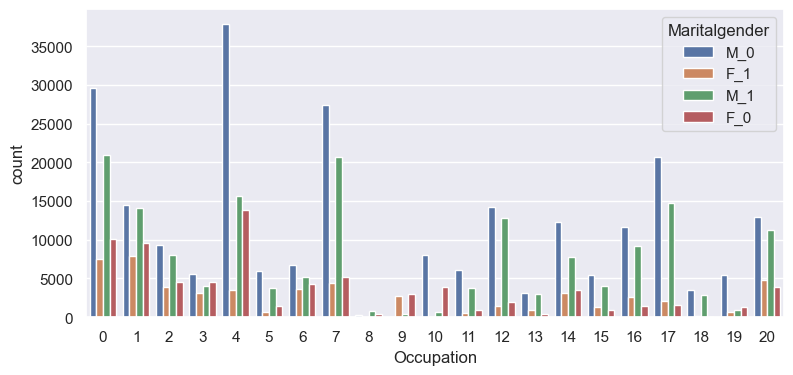

In [161]:
sns.countplot(data = df ,x = 'Occupation' , hue = 'Maritalgender')

<Axes: xlabel='Occupation', ylabel='count'>

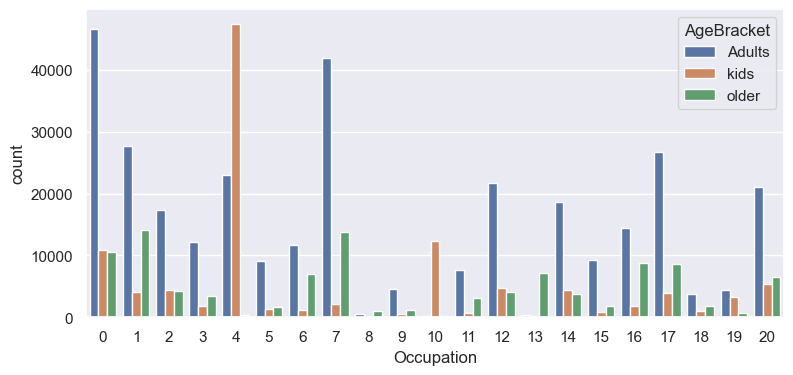

In [163]:
sns.countplot(data = df , x ='Occupation' , hue = 'AgeBracket')

## (vi). Analysis By Product Category

<Axes: xlabel='Product_Category_1'>

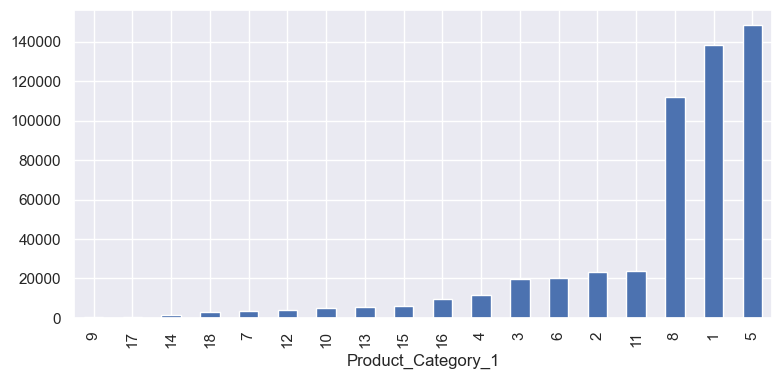

In [166]:
df.groupby('Product_Category_1').size().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

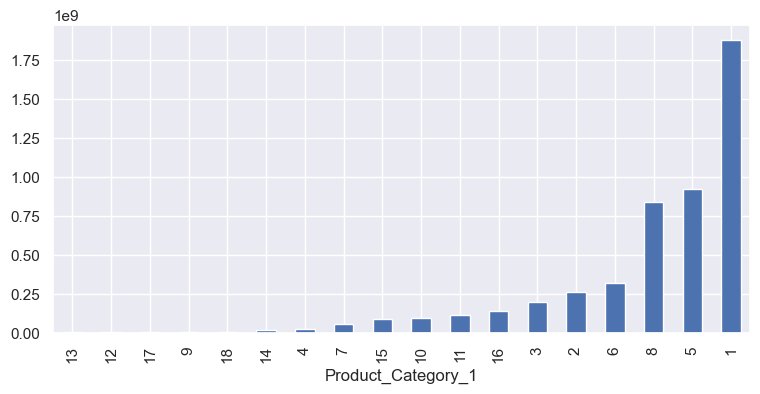

In [168]:
df.groupby('Product_Category_1')['Purchase'].sum().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

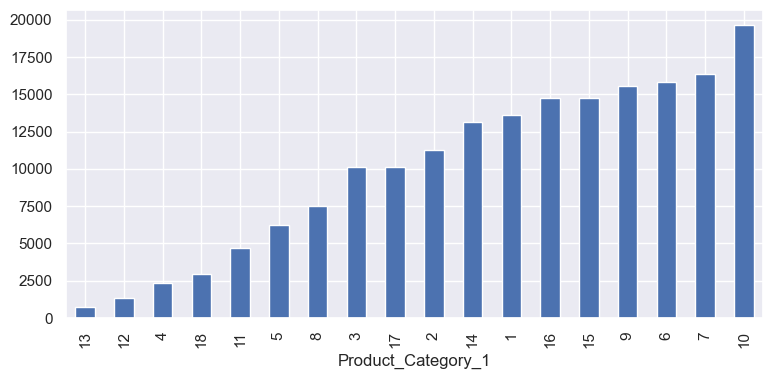

In [170]:
df.groupby('Product_Category_1')['Purchase'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='Product_ID'>

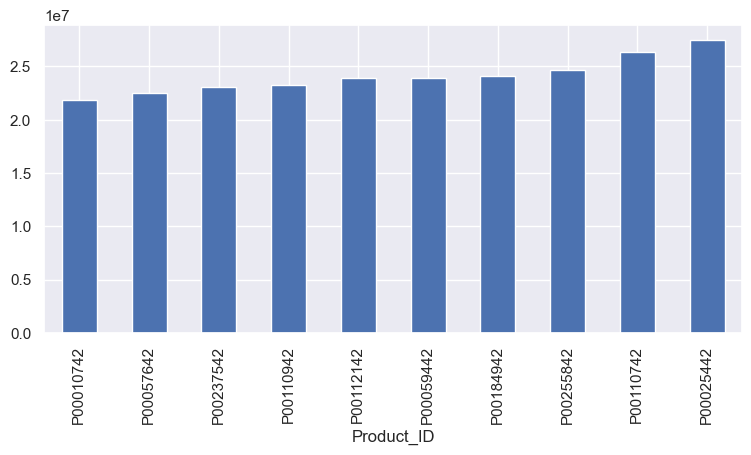

In [187]:
#Sum of top 10 Products
df.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values().plot(kind='bar')

### Using Multiple Columns with Product Category

<Axes: xlabel='Product_Category_1', ylabel='count'>

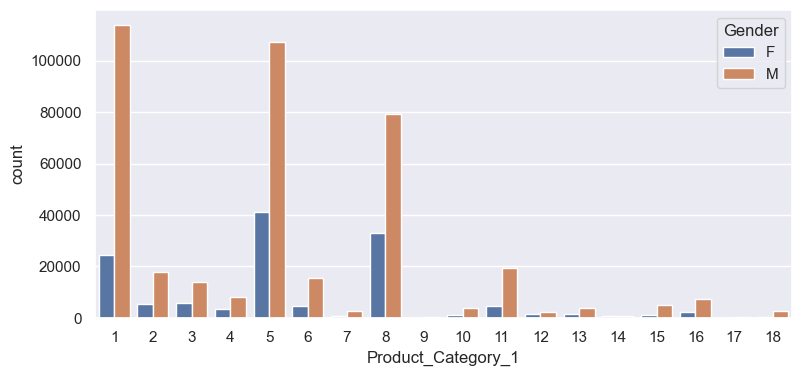

In [177]:
sns.countplot( data = df ,x ='Product_Category_1' , hue = 'Gender')

<Axes: xlabel='Product_Category_1', ylabel='count'>

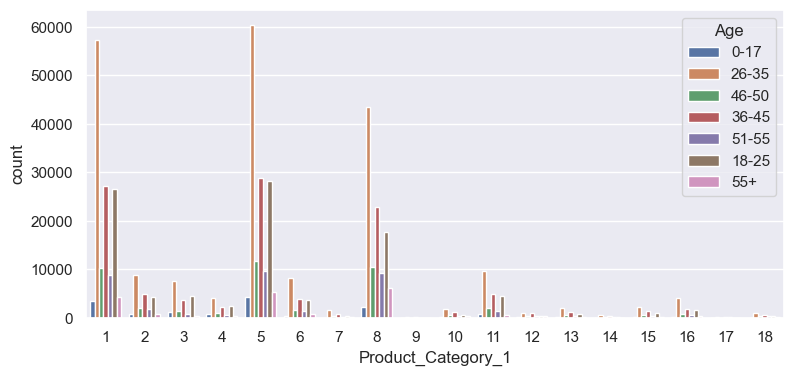

In [179]:
sns.countplot( data = df ,x ='Product_Category_1' , hue = 'Age')

<Axes: xlabel='Product_Category_1', ylabel='count'>

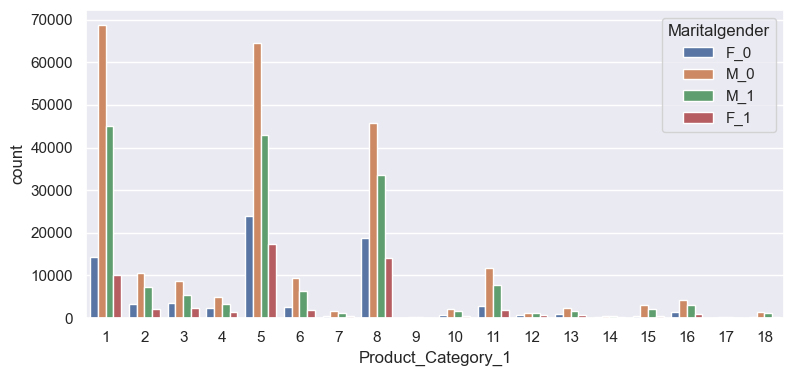

In [181]:
sns.countplot(data = df ,x = 'Product_Category_1' , hue = 'Maritalgender')

<Axes: xlabel='Product_Category_1', ylabel='count'>

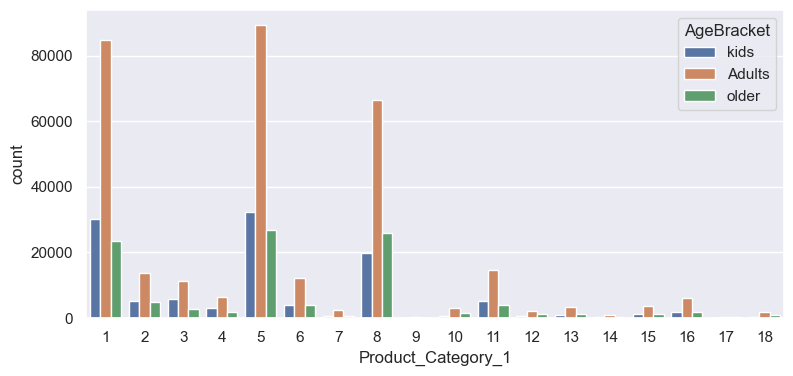

In [183]:
sns.countplot(data = df , x ='Product_Category_1' , hue = 'AgeBracket')

<Axes: xlabel='Product_Category_1', ylabel='count'>

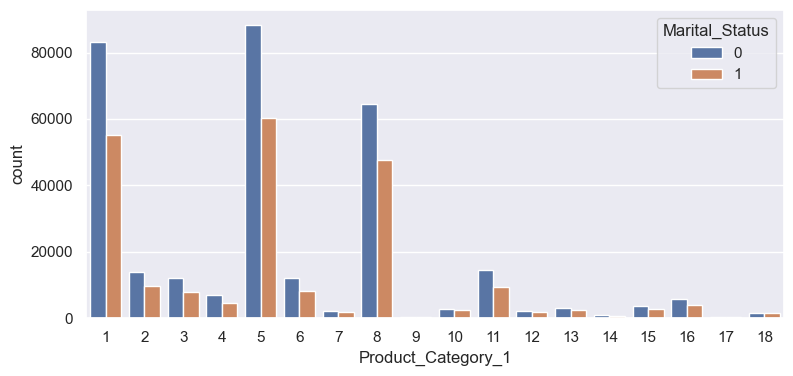

In [185]:
sns.countplot( data = df ,x ='Product_Category_1' , hue = 'Marital_Status')

In [189]:
#--------------------------------------------------------END-----------------------------------------------------------------------